In [ ]:
import json

# Paste only your actual token between the quotes below
kaggle_token = "KGAT_ec2565d79d2f9a7e1a7cbf38b1420402"

# Create the kaggle.json structure
token_dict = {"username":"sh5mre","key": kaggle_token}

# Save the json file
with open("/content/kaggle.json", "w") as file:
    json.dump(token_dict, file)


In [ ]:
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data


Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
 84% 405M/481M [00:02<00:00, 118MB/s]
100% 481M/481M [00:02<00:00, 188MB/s]


In [ ]:
!unzip fracture-multi-region-x-ray-data.zip -d xray_dataset


Streaming output truncated to the last 5000 lines.
  inflating: xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3 (1).jpg  
  inflating: xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1 (1).jpg  
  inflating: xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1.jpg  
  inflating: xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3.jpg  
  inflating: xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2.jpg  
  inflating: xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated3 (1).jpg  
  inflating: 

In [ ]:
import os
from PIL import Image

dataset_path = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification"
folders = ["train", "val", "test"]
img_extensions = (".png", ".jpg", ".jpeg", ".tiff", ".bmp")

def is_image(file):
    return file.lower().endswith(img_extensions)

stats = {}

for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    folder_count = {"total": 0, "classes": {}, "dimensions": [], "color": []}

    # Automatically find class subfolders
    if not os.path.exists(folder_path):
        continue
    class_dirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

    for cls in class_dirs:
        cls_path = os.path.join(folder_path, cls)
        imgs = []
        for root, _, files in os.walk(cls_path):
            for f in files:
                if is_image(f):
                    imgs.append(os.path.join(root, f))
        count = len(imgs)
        folder_count["classes"][cls] = count
        folder_count["total"] += count

        for img_file in imgs:
            try:
                img = Image.open(img_file)
                folder_count["dimensions"].append(img.size)
                folder_count["color"].append("color" if img.mode == "RGB" else "grayscale")
            except:
                print(f"Warning: cannot open {img_file}")

    stats[folder] = folder_count

# Display summary
for folder, info in stats.items():
    print(f"\nFolder: {folder}")
    print(f"  Total images: {info['total']}")
    for cls_name, cls_count in info["classes"].items():
        print(f"  {cls_name}: {cls_count}")
    print(f"  Unique dimensions: {set(info['dimensions'])}")
    print(f"  Color modes: {set(info['color'])}")



Folder: train
  Total images: 9246
  fractured: 4606
  not fractured: 4640
  Unique dimensions: {(300, 270), (223, 297), (1013, 2021), (275, 353), (821, 1024), (355, 480), (704, 1024), (715, 1024), (800, 1248), (477, 716), (750, 1256), (3000, 3955), (1500, 2000), (439, 600), (858, 1468), (938, 1168), (1110, 1140), (432, 1063), (678, 728), (1086, 1206), (323, 500), (814, 845), (313, 1008), (644, 1754), (290, 350), (377, 327), (1602, 1890), (1024, 839), (176, 230), (226, 298), (2320, 2920), (751, 955), (372, 370), (799, 1669), (380, 630), (515, 836), (224, 224), (582, 1500), (225, 225), (245, 450), (153, 303), (334, 482), (1278, 1361), (1608, 1236), (698, 1024), (442, 442), (495, 835), (603, 1024), (486, 1024), (600, 399), (575, 562), (1099, 1385), (1223, 1668), (258, 626), (1500, 1558), (279, 667), (319, 483), (1017, 1199), (525, 835), (450, 405), (293, 610), (265, 377), (198, 332), (274, 300), (1050, 1097), (1050, 2000), (226, 418), (410, 498), (525, 812), (800, 531), (426, 726), (183

In [ ]:
import numpy as np
import pandas as pd
import os
base_path = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/"
categories = ["fractured", "not fractured"]
image_paths = []
labels = []
for category in categories:
  category_path = os.path.join(base_path, category)
  for image_name in os.listdir(category_path):
    image_path = os.path.join(category_path, image_name)
    image_paths.append(image_path)
    labels.append(category)
df = pd.DataFrame({
"image_path": image_paths,
"label": labels
})
df.head()

image_path      label
0  /content/xray_dataset/Bone_Fracture_Binary_Cla...  fractured
1  /content/xray_dataset/Bone_Fracture_Binary_Cla...  fractured
2  /content/xray_dataset/Bone_Fracture_Binary_Cla...  fractured
3  /content/xray_dataset/Bone_Fracture_Binary_Cla...  fractured
4  /content/xray_dataset/Bone_Fracture_Binary_Cla...  fractured

In [ ]:
df.tail()

image_path          label
9241  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9242  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9243  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9244  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9245  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured

In [ ]:
df.shape

(9246, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  9246 non-null   object
 1   label       9246 non-null   object
dtypes: object(2)
memory usage: 144.6+ KB


In [ ]:
df['label'].unique()

array(['fractured', 'not fractured'], dtype=object)

In [ ]:
df['label'].value_counts()

label
not fractured    4640
fractured        4606
Name: count, dtype: int64

/tmp/ipython-input-3633642057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


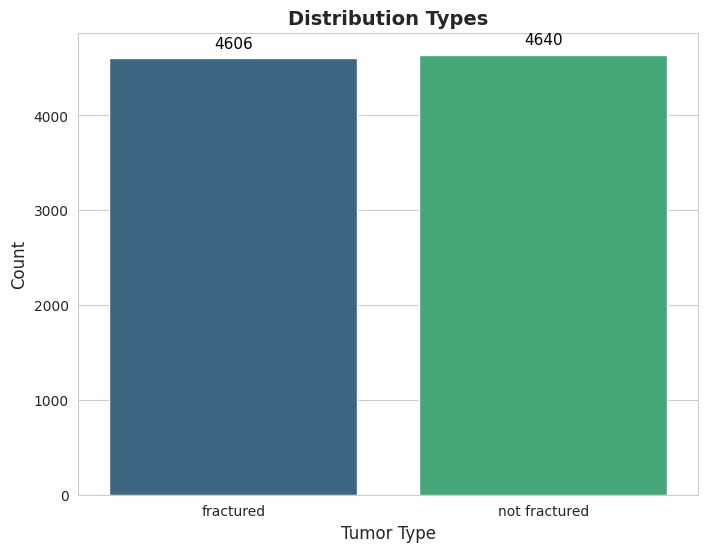

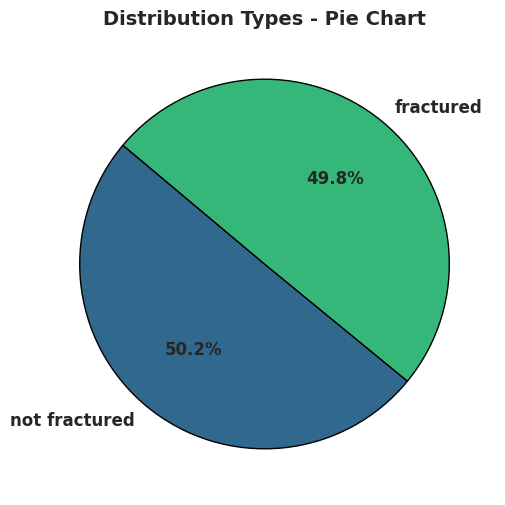

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}',
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='bottom', fontsize=11, color='black',
              xytext=(0, 5), textcoords='offset points')
plt.show()
label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
startangle=140, colors=colors, textprops={'fontsize': 12, 'weight':
'bold'},
wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution Types - Pie Chart", fontsize=14,
fontweight='bold')
plt.show()

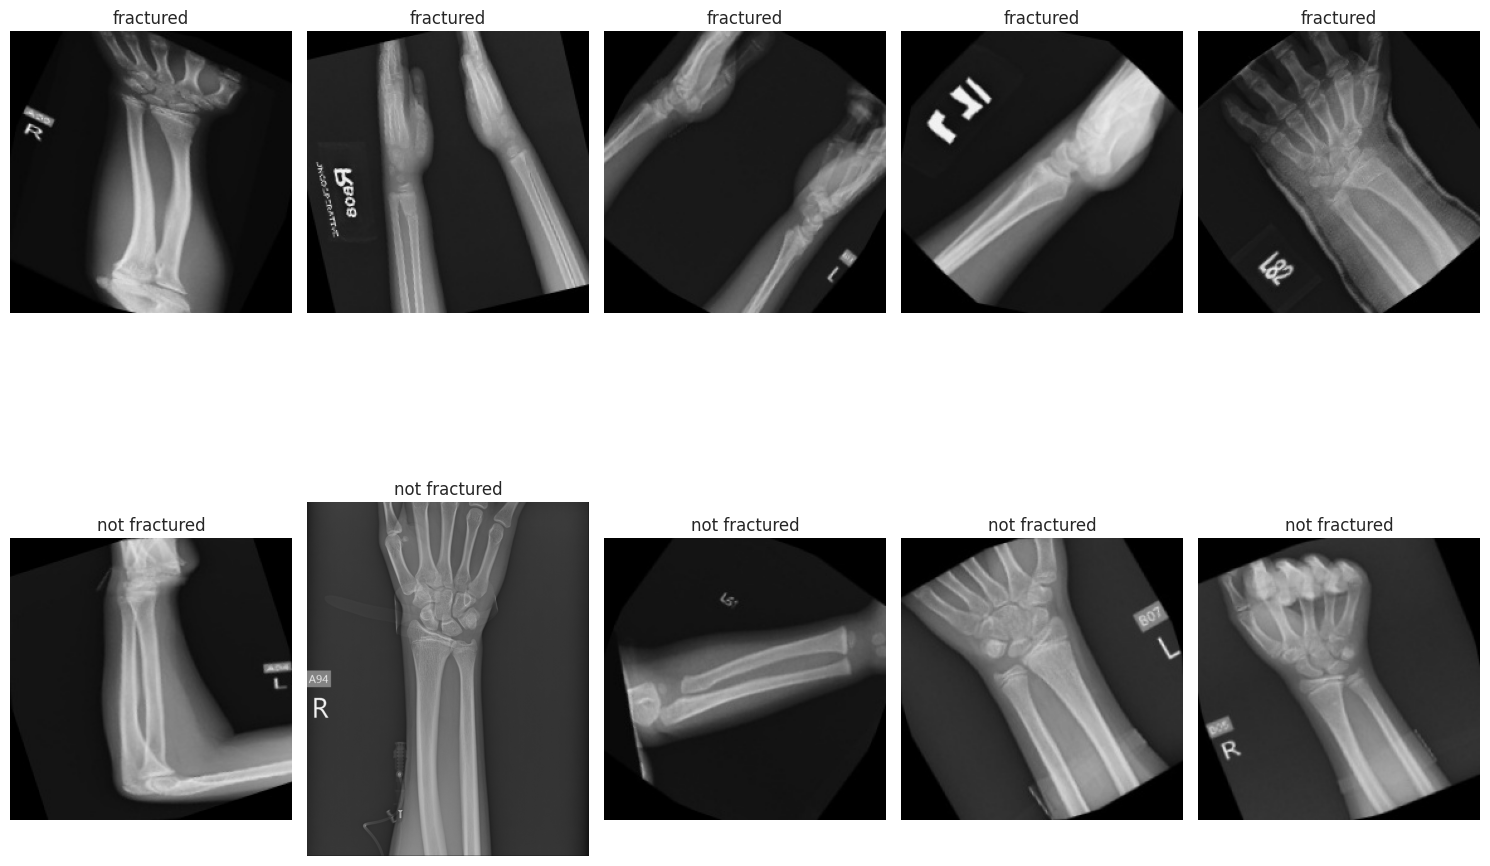

In [ ]:
import cv2
num_images = 5
plt.figure(figsize=(15, 12))
for i, category in enumerate(categories):
  category_images = df[df['label'] ==
category]['image_path'].iloc[:num_images]
  for j, img_path in enumerate(category_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(len(categories), num_images, i * num_images + j + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
plt.tight_layout()
plt.show()

In [ ]:
df

image_path          label
0     /content/xray_dataset/Bone_Fracture_Binary_Cla...      fractured
1     /content/xray_dataset/Bone_Fracture_Binary_Cla...      fractured
2     /content/xray_dataset/Bone_Fracture_Binary_Cla...      fractured
3     /content/xray_dataset/Bone_Fracture_Binary_Cla...      fractured
4     /content/xray_dataset/Bone_Fracture_Binary_Cla...      fractured
...                                                 ...            ...
9241  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9242  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9243  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9244  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured
9245  /content/xray_dataset/Bone_Fracture_Binary_Cla...  not fractured

[9246 rows x 2 columns]

In [ ]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image, ImageFile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'],
random_state=42)

class FractureDataset(Dataset):
  def __init__(self, df, transform=None):
      self.df = df
      self.transform = transform
      self.label_map = {'fractured': 1, 'not fractured': 0}
  def __len__(self): return len(self.df)
  def __getitem__(self, idx):
      row = self.df.iloc[idx]
      img = Image.open(row['image_path']).convert('RGB')
      label = self.label_map[row['label']]
      if self.transform: img = self.transform(img)
      return img, label
transform = transforms.Compose([
transforms.Resize((224, 224)),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224,
0.225])
])
train_dataset = FractureDataset(train_df, transform)
val_dataset = FractureDataset(val_df, transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

UNPRUNED RESNET 18 MODEL


In [ ]:
import torch
import torch.nn as nn
import torchvision

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create unpruned model
model = torchvision.models.resnet18(weights='DEFAULT')
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train for 10 epochs
print("Training unpruned model...")
for epoch in range(10):
    model.train()
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()

    # Evaluate
    model.eval()
    correct = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            correct += (model(X).argmax(1) == y).sum().item()

    acc = correct / len(val_dataset)
    print(f"Epoch {epoch+1}/10 - Validation Accuracy: {acc:.4f}")

# Final accuracy
print(f"\nFinal Unpruned Model Accuracy: {acc:.4f}")

# Save the trained unpruned model
torch.save(model.state_dict(), 'unpruned_model.pth')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


Training unpruned model...
Epoch 1/10 - Validation Accuracy: 0.9881
Epoch 2/10 - Validation Accuracy: 0.9811
Epoch 3/10 - Validation Accuracy: 0.9886
Epoch 4/10 - Validation Accuracy: 0.9108
Epoch 5/10 - Validation Accuracy: 0.9935
Epoch 6/10 - Validation Accuracy: 0.9897
Epoch 7/10 - Validation Accuracy: 0.5546
Epoch 8/10 - Validation Accuracy: 0.9719
Epoch 9/10 - Validation Accuracy: 0.9930
Epoch 10/10 - Validation Accuracy: 0.9946

Final Unpruned Model Accuracy: 0.9946


CUCKOO SEARCH ALGORITHM


LOADING BASE MODEL
✓ Base model loaded successfully

CORRECTED CUCKOO SEARCH WITH MEDICAL FITNESS

ITERATION 1/8

[Nest 1/10] Evaluating sparsity=0.9131
  → Running warm-up training...
  → Computing medical fitness...
  ✓ Fitness=0.8391 | Acc=0.8157 | F1=0.8085 | AUC=0.8667

[Nest 2/10] Evaluating sparsity=0.9003
  → Running warm-up training...
  → Computing medical fitness...
  ✓ Fitness=0.7667 | Acc=0.7551 | F1=0.7091 | AUC=0.8059

[Nest 3/10] Evaluating sparsity=0.9094
  → Running warm-up training...
  → Computing medical fitness...
  ✓ Fitness=0.9269 | Acc=0.8935 | F1=0.8989 | AUC=0.9571

[Nest 4/10] Evaluating sparsity=0.9061
  → Running warm-up training...
  → Computing medical fitness...
  ✓ Fitness=0.7344 | Acc=0.6784 | F1=0.5420 | AUC=0.8723

[Nest 5/10] Evaluating sparsity=0.9286
  → Running warm-up training...
  → Computing medical fitness...
  ✓ Fitness=0.7852 | Acc=0.7411 | F1=0.7765 | AUC=0.8080

[Nest 6/10] Evaluating sparsity=0.9202
  → Running warm-up training...
  → 

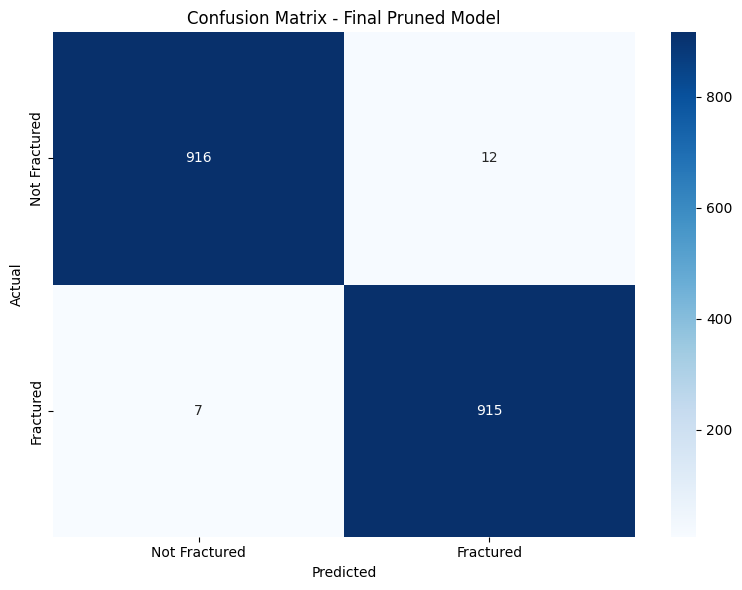

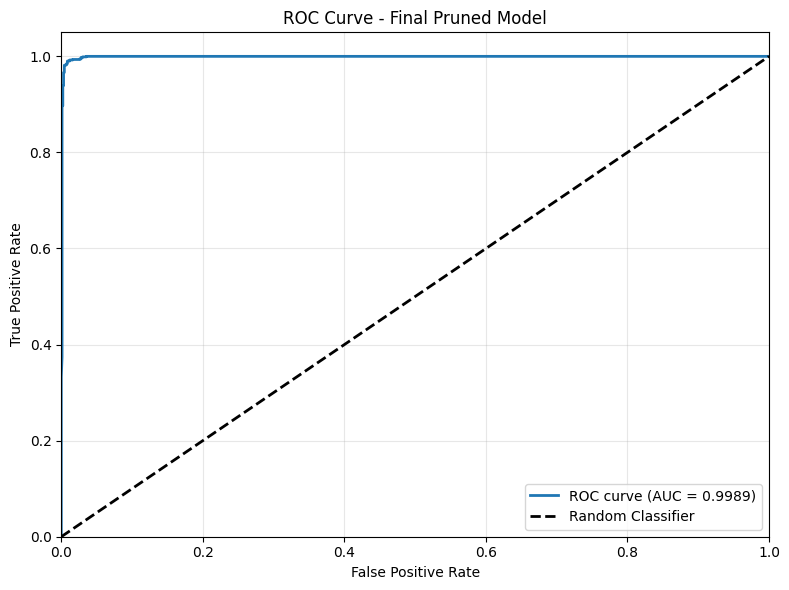

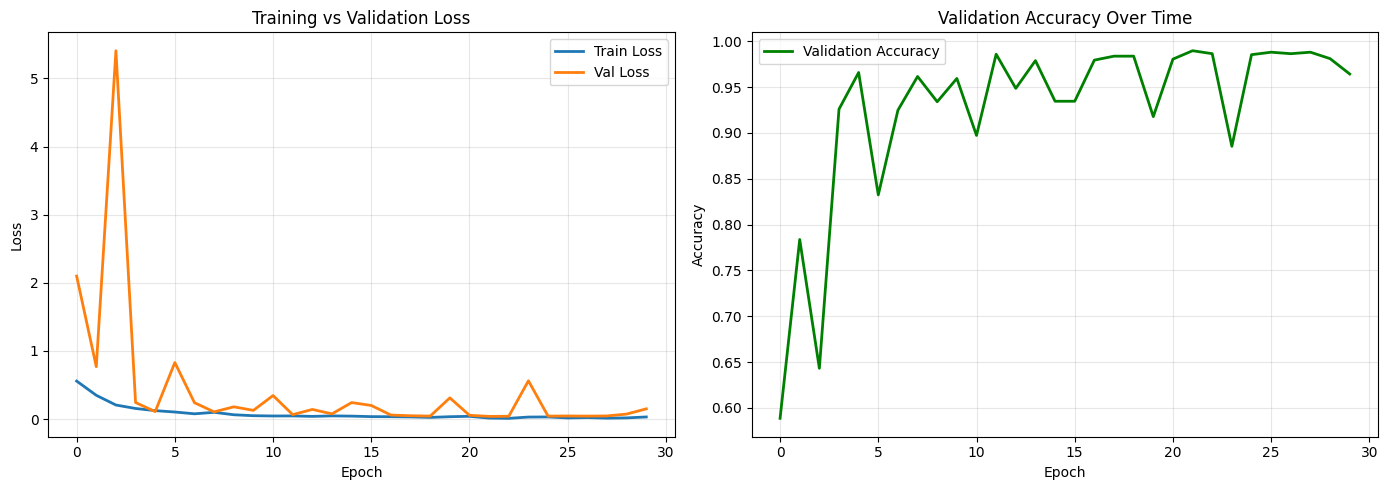


✓ All visualizations saved successfully!
  - confusion_matrix.png
  - roc_curve.png
  - training_history.png


In [ ]:
import torch
import torch.nn as nn
import torchvision
import copy
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, roc_auc_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================
# MEDICAL FITNESS FUNCTION (CORRECTED)
# =============================
def medical_fitness(model, val_loader):
    """
    Composite fitness: 0.5*AUC + 0.3*F1 + 0.2*Accuracy
    Stable under extreme pruning and clinically relevant
    """
    model.eval()
    y_true, y_pred, y_prob = [], [], []

    with torch.no_grad():
        for X, y in val_loader:
            X = X.to(device)
            outputs = model(X)
            probs = torch.softmax(outputs, dim=1)

            y_true.extend(y.cpu().numpy())
            y_pred.extend(outputs.argmax(1).cpu().numpy())
            y_prob.extend(probs[:, 1].cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    # Calculate metrics
    acc = np.mean(y_true == y_pred)
    f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

    # Handle edge case where all predictions are same class
    try:
        auc_score = roc_auc_score(y_true, y_prob)
    except:
        auc_score = 0.5

    # Composite fitness
    fitness = 0.5 * auc_score + 0.3 * f1 + 0.2 * acc

    return fitness, acc, f1, auc_score


# =============================
# WARM-UP TRAINING (CRITICAL FIX)
# =============================
def warmup_train(model, train_loader, epochs=3, lr=1e-4):
    """
    Short fine-tuning to stabilize pruned network before evaluation
    """
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(X), y)
            loss.backward()
            optimizer.step()

    return model


# =============================
# SYNFLOW PRUNING (YOUR EXISTING - WITH DEVICE FIX)
# =============================
def final_synflow_pruning(model, sparsity, iters=100):
    """
    Your existing SynFlow implementation with device handling fix
    """
    model.train()

    # Initialize positive weights
    for p in model.parameters():
        if p.dim() > 1:
            p.data = torch.abs(p.data)

    # Get device from model
    model_device = next(model.parameters()).device
    dummy = torch.randn(1, 3, 224, 224).to(model_device)

    # Iterative score computation
    for _ in range(iters):
        out = model(dummy)
        loss = out.sum()
        model.zero_grad()
        loss.backward()

        for p in model.parameters():
            if p.grad is not None and p.dim() > 1:
                p.data = p.data * torch.abs(p.grad)

    # Compute global threshold
    scores = {}
    for n, p in model.named_parameters():
        if p.dim() > 1:
            scores[n] = p.data.abs().flatten()

    total = sum(s.numel() for s in scores.values())
    thr = torch.topk(
        torch.cat([s for s in scores.values()]),
        int(total * sparsity),
        largest=False
    )[0].max()

    # Apply pruning mask
    for n, p in model.named_parameters():
        if p.dim() > 1:
            mask = (p.data.abs() >= thr).float()
            p.data *= mask

    return model


# =============================
# CUCKOO SEARCH (FULLY CORRECTED)
# =============================
def cuckoo_sparsity_search(base_model, train_loader, val_loader,
                           n_nests=10, n_iterations=8):
    """
    Corrected Cuckoo Search with:
    - Medical fitness function
    - Warm-up training before evaluation
    - Proper best nest selection
    - Global best tracking
    """
    lower_bound = 0.90
    upper_bound = 0.95

    # Initialize nests (sparsity values)
    nests = np.random.uniform(lower_bound, upper_bound, n_nests)

    # Cuckoo Search parameters
    pa = 0.25  # Abandonment probability
    beta = 1.5  # Levy flight parameter

    def levy_flight(beta):
        sigma = (math.gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (math.gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.randn() * sigma
        v = np.random.randn()
        step = u / abs(v)**(1 / beta)
        return 0.01 * step

    # Global best tracking
    global_best_sparsity = None
    global_best_fitness = -1
    global_best_metrics = {}

    print("="*60)
    print("CORRECTED CUCKOO SEARCH WITH MEDICAL FITNESS")
    print("="*60)

    for it in range(n_iterations):
        print(f"\n{'='*60}")
        print(f"ITERATION {it+1}/{n_iterations}")
        print(f"{'='*60}")

        fitness_vals = []
        metrics_log = []

        # Evaluate all nests
        for i in range(n_nests):
            print(f"\n[Nest {i+1}/{n_nests}] Evaluating sparsity={nests[i]:.4f}")

            # Create pruned model
            m = copy.deepcopy(base_model)
            m = m.to(device)
            m = final_synflow_pruning(m, sparsity=nests[i])

            # CRITICAL: Warm-up training before evaluation
            print("  → Running warm-up training...")
            m = warmup_train(m, train_loader, epochs=3, lr=1e-4)

            # Evaluate with medical fitness
            print("  → Computing medical fitness...")
            fitness, acc, f1, auc_score = medical_fitness(m, val_loader)
            fitness_vals.append(fitness)
            metrics_log.append({
                'sparsity': nests[i],
                'fitness': fitness,
                'acc': acc,
                'f1': f1,
                'auc': auc_score
            })

            print(f"  ✓ Fitness={fitness:.4f} | Acc={acc:.4f} | F1={f1:.4f} | AUC={auc_score:.4f}")

        # Find best nest in this iteration (FIXED: was np.argmax(nests))
        idx_best = np.argmax(fitness_vals)
        iter_best_fitness = fitness_vals[idx_best]
        iter_best_sparsity = nests[idx_best]

        print(f"\n{'─'*60}")
        print(f"Iteration {it+1} Best:")
        print(f"  Sparsity: {iter_best_sparsity:.4f}")
        print(f"  Fitness:  {iter_best_fitness:.4f}")
        print(f"  Acc:      {metrics_log[idx_best]['acc']:.4f}")
        print(f"  F1:       {metrics_log[idx_best]['f1']:.4f}")
        print(f"  AUC:      {metrics_log[idx_best]['auc']:.4f}")

        # Update global best
        if iter_best_fitness > global_best_fitness:
            global_best_fitness = iter_best_fitness
            global_best_sparsity = iter_best_sparsity
            global_best_metrics = metrics_log[idx_best]
            print(f"  🎯 NEW GLOBAL BEST!")

        # Generate new nests via Levy flight
        for i in range(n_nests):
            step = levy_flight(beta)
            nests[i] = np.clip(
                nests[i] + step * np.random.randn(),
                lower_bound,
                upper_bound
            )

        # Abandon worst nests
        abandon_count = int(pa * n_nests)
        abandon_indices = np.random.choice(n_nests, abandon_count, replace=False)
        for idx in abandon_indices:
            nests[idx] = np.random.uniform(lower_bound, upper_bound)

    print(f"\n{'='*60}")
    print("OPTIMIZATION COMPLETE")
    print(f"{'='*60}")
    print(f"Global Best Sparsity: {global_best_sparsity:.4f}")
    print(f"Global Best Fitness:  {global_best_fitness:.4f}")
    print(f"  ├─ Accuracy:  {global_best_metrics['acc']:.4f}")
    print(f"  ├─ F1 Score:  {global_best_metrics['f1']:.4f}")
    print(f"  └─ ROC-AUC:   {global_best_metrics['auc']:.4f}")
    print(f"{'='*60}\n")

    return global_best_sparsity, global_best_fitness, global_best_metrics


# =============================
# FULL TRAINING FUNCTION
# =============================
def train_model(model, train_loader, val_loader, epochs=30, lr=1e-3):
    """
    Complete training with early stopping
    """
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    best_acc = 0.0
    best_state = None
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training
        model.train()
        running_loss = 0.0

        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        correct, total = 0, 0
        val_loss = 0.0

        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                preds = outputs.argmax(1)
                correct += (preds == y).sum().item()
                total += y.size(0)

        val_loss /= len(val_loader)
        acc = correct / total

        val_losses.append(val_loss)
        val_accuracies.append(acc)

        print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {train_loss:.4f} | Val Acc: {acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_state = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_state)
    return model, best_acc, train_losses, val_losses, val_accuracies


# =============================
# MAIN WORKFLOW
# =============================
print("\n" + "="*60)
print("LOADING BASE MODEL")
print("="*60)
base_model = torchvision.models.resnet18(weights=None)
base_model.fc = nn.Linear(base_model.fc.in_features, 2)
base_model.load_state_dict(torch.load('unpruned_model.pth', map_location=device))
base_model.to(device)
print("✓ Base model loaded successfully\n")

# Run Cuckoo Search
best_sparsity, best_fitness, best_metrics = cuckoo_sparsity_search(
    base_model, train_loader, val_loader, n_nests=10, n_iterations=8
)

# Apply optimal sparsity and train final model
print("\n" + "="*60)
print("TRAINING FINAL MODEL WITH OPTIMAL SPARSITY")
print("="*60)
print(f"Applying sparsity: {best_sparsity:.4f}\n")

final_model = torchvision.models.resnet18(weights=None)
final_model.fc = nn.Linear(final_model.fc.in_features, 2)
final_model.load_state_dict(torch.load('unpruned_model.pth', map_location=device))
final_model.to(device)

final_model = final_synflow_pruning(final_model, sparsity=best_sparsity)

final_model, final_accuracy, train_losses, val_losses, val_accuracies = train_model(
    final_model, train_loader, val_loader, epochs=30, lr=1e-3
)

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Optimized Sparsity:      {best_sparsity:.4f}")
print(f"Optimization Fitness:    {best_fitness:.4f}")
print(f"Final Model Accuracy:    {final_accuracy:.4f}")
print("="*60 + "\n")

torch.save(final_model.state_dict(), 'cuckoo_pruned_final_model.pth')

# =============================
# COMPREHENSIVE EVALUATION
# =============================
print("Generating evaluation metrics...\n")

# Collect predictions
final_model.eval()
y_true, y_pred, y_prob = [], [], []

with torch.no_grad():
    for X, y in val_loader:
        X = X.to(device)
        outputs = final_model(X)
        probs = torch.softmax(outputs, dim=1)

        y_true.extend(y.cpu().numpy())
        y_pred.extend(outputs.argmax(1).cpu().numpy())
        y_prob.extend(probs[:, 1].cpu().numpy())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Fractured", "Fractured"]))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Fractured", "Fractured"],
            yticklabels=["Not Fractured", "Fractured"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Pruned Model")
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Pruned Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Training History
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(train_losses, label='Train Loss', linewidth=2)
ax1.plot(val_losses, label='Val Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training vs Validation Loss')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(val_accuracies, label='Validation Accuracy', linewidth=2, color='green')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Validation Accuracy Over Time')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All visualizations saved successfully!")
print("  - confusion_matrix.png")
print("  - roc_curve.png")
print("  - training_history.png")

In [ ]:
!pip install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-he

XAI


In [ ]:
# ================================
# INTEGRATED GRADIENTS WITH FRACTURE FOCUS
# ================================
def compute_fracture_ig(x, target, img_gray, fracture_map):
    ig = IntegratedGradients(model)
    attr = ig.attribute(x, target=target, n_steps=50)
    attr = attr.abs().sum(1).squeeze().cpu().detach().numpy()

    # Normalize
    attr -= attr.min()
    if attr.max() > 0:
        attr /= attr.max()

    # Edge detection
    edges = sobel(img_gray)
    edges /= edges.max() + 1e-8

    # Bone region
    bone_mask = img_gray > np.percentile(img_gray, 35)

    # Combine with fracture map
    fracture_region = fracture_map > 0.1
    fracture_region = ndimage.binary_dilation(fracture_region, iterations=10)

    # Final map
    ig_fracture = attr * edges * bone_mask * fracture_region

    if ig_fracture.max() > 0:
        ig_fracture /= ig_fracture.max()

        # Threshold
        threshold = np.percentile(ig_fracture[ig_fracture > 0], 70)
        binary = ig_fracture > threshold
        binary = ndimage.binary_dilation(binary, iterations=7)

        ig_fracture = ig_fracture * binary
        ig_fracture = ndimage.gaussian_filter(ig_fracture, sigma=2.5)

        if ig_fracture.max() > 0:
            ig_fracture /= ig_fracture.max()

    return ig_fracture

Image 1 - Ground Truth: Fractured, Prediction: Fractured (Confidence: 100.00%)
Image 2 - Ground Truth: Fractured, Prediction: Fractured (Confidence: 100.00%)


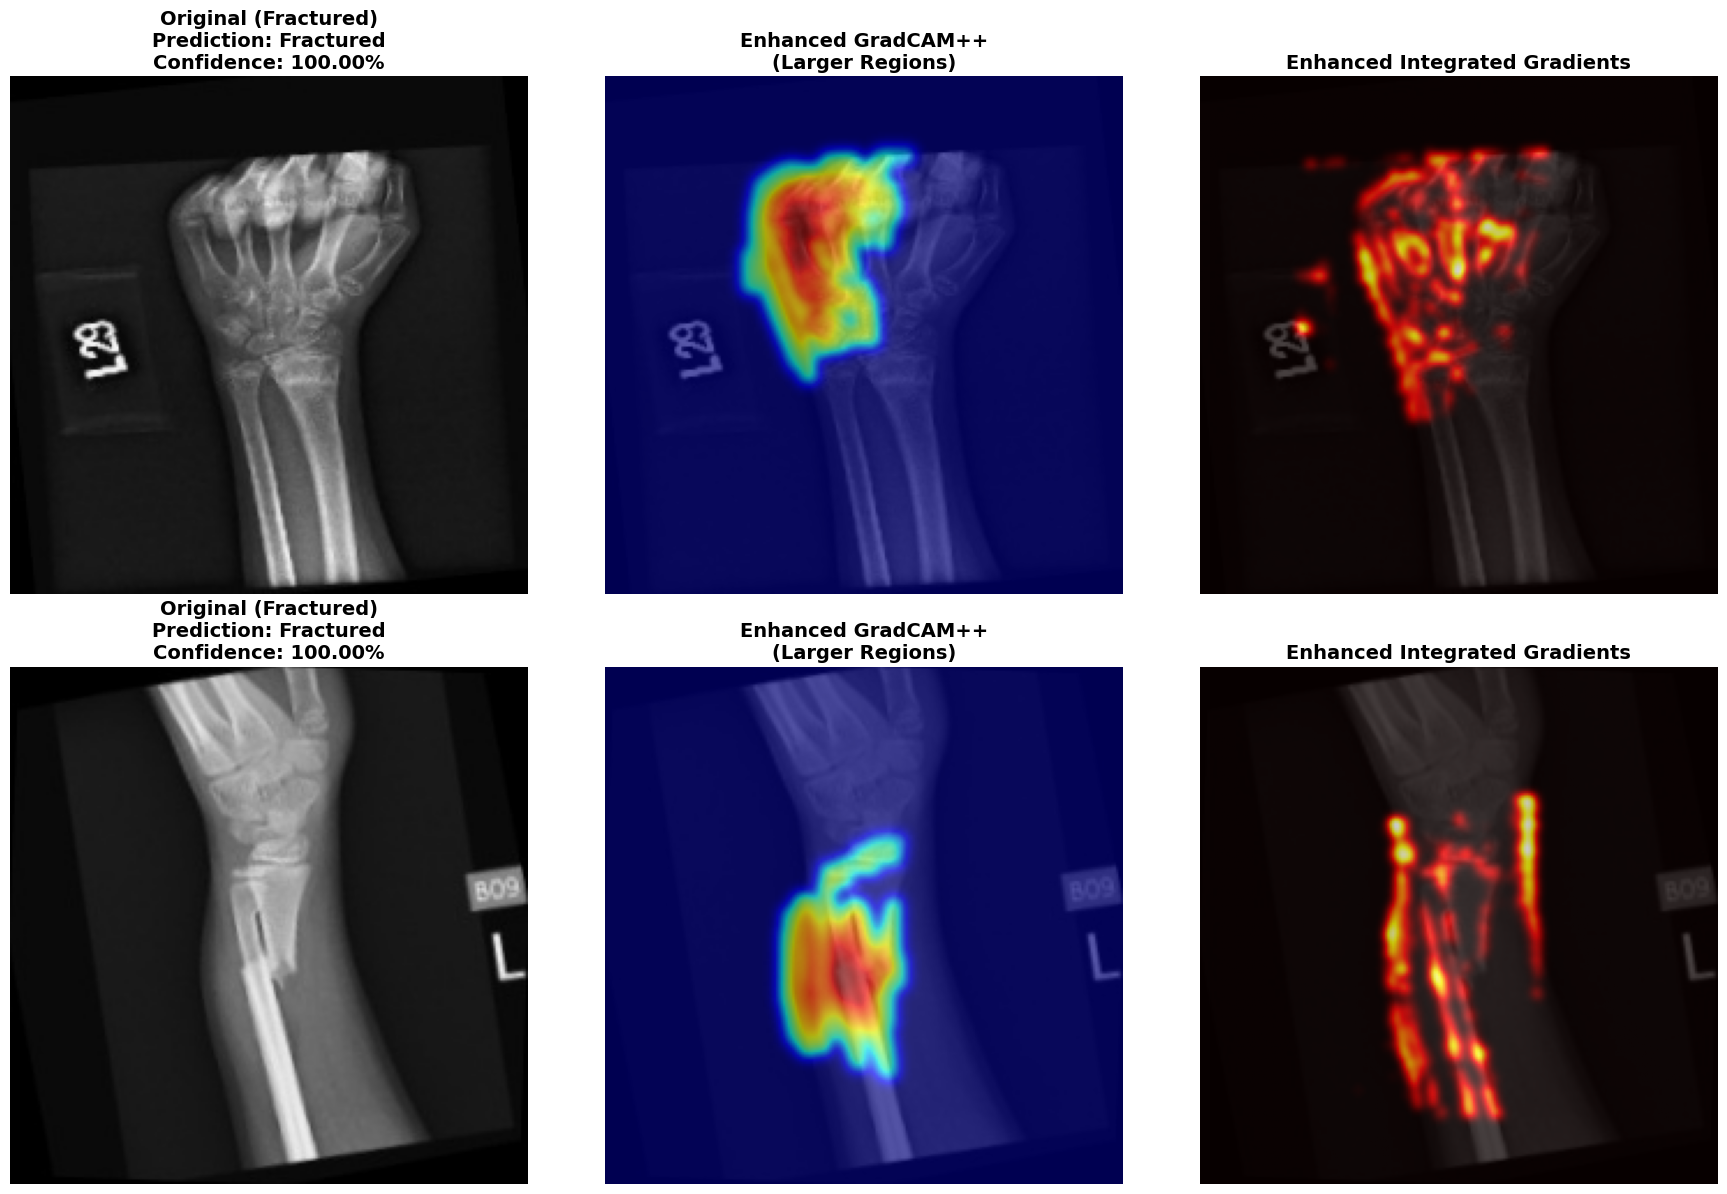

In [ ]:
# ================================
# INSTALL
# ================================
!pip install scikit-image captum

# ================================
# IMPORTS
# ================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from captum.attr import IntegratedGradients
from skimage.filters import sobel
from scipy import ndimage
import cv2

# ================================
# DEVICE & MODEL
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet18
model = torchvision.models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("cuckoo_pruned_final_model.pth", map_location=device))
model.to(device)
model.eval()

# ================================
# IMPROVED GRADCAM++ WITH LARGER REGIONS
# ================================
class EnhancedFractureGradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_tensor, img_gray, target_class=None):
        self.model.zero_grad()
        output = self.model(input_tensor)

        if target_class is None:
            target_class = output.argmax(dim=1).item()

        # Backprop
        class_loss = output[0, target_class]
        class_loss.backward()

        gradients = self.gradients[0]
        activations = self.activations[0]

        # GradCAM++ weights
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + (activations * gradients.pow(3)).sum(dim=(1, 2), keepdim=True)
        alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / (alpha_denom + 1e-8)

        weights = (alpha * F.relu(gradients)).sum(dim=(1, 2))
        cam = (weights[:, None, None] * activations).sum(dim=0)
        cam = F.relu(cam)

        # Normalize CAM
        cam -= cam.min()
        if cam.max() > 0:
            cam /= cam.max()

        # Resize to 224x224
        cam_np = cv2.resize(cam.cpu().numpy(), (224, 224))

        # Apply enhanced focusing with larger regions
        cam_enhanced = self.enhanced_fracture_focus(cam_np, img_gray)

        return cam_enhanced

    def enhanced_fracture_focus(self, cam, img_gray, focus_strength=1.8, threshold_percentile=55):
        """
        Enhanced version that creates larger, more visible highlighting regions
        """
        # 1. Multi-scale edge detection
        edges_sobel = sobel(img_gray)

        img_uint8 = (img_gray * 255).astype(np.uint8)
        edges_canny = cv2.Canny(img_uint8, 20, 80) / 255.0

        # Combine edges with more weight on Canny
        edges = np.maximum(edges_sobel, edges_canny * 1.8)
        edges = edges / (edges.max() + 1e-8)

        # 2. Less aggressive power transform for broader coverage
        cam_focused = np.power(cam, focus_strength)

        # 3. Lower threshold to include more region
        if cam_focused.max() > 0:
            threshold = np.percentile(cam_focused[cam_focused > 0], threshold_percentile)
            cam_focused[cam_focused < threshold] = 0

        # 4. Edge guidance with broader boost
        cam_edge_guided = cam_focused * (1 + edges * 3.0)

        # 5. More aggressive dilation to create larger regions
        if cam_edge_guided.max() > 0:
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()

            # Create larger structuring elements
            binary = cam_edge_guided > 0.3

            # First, dilate significantly to expand regions
            binary = ndimage.binary_dilation(binary, structure=np.ones((9, 9)))

            # Then closing to connect nearby components
            binary = ndimage.binary_closing(binary, structure=np.ones((11, 11)))

            # Light opening to smooth edges
            binary = ndimage.binary_opening(binary, structure=np.ones((3, 3)))

            # Dilate once more for visibility
            binary = ndimage.binary_dilation(binary, structure=np.ones((5, 5)))

            cam_edge_guided = cam_edge_guided * binary

        # 6. Component selection - keep strong components
        if cam_edge_guided.max() > 0:
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()

            labeled, num_features = ndimage.label(cam_edge_guided > 0.2)

            if num_features > 0:
                component_scores = []
                for i in range(1, num_features + 1):
                    mask = labeled == i
                    size = mask.sum()
                    avg_intensity = cam_edge_guided[mask].mean()
                    edge_alignment = edges[mask].mean()
                    # Score considers size, intensity, and edge alignment
                    score = avg_intensity * (1 + edge_alignment * 2) * np.sqrt(size)
                    component_scores.append((i, score, size))

                # Keep top 2-3 components, but require minimum size
                component_scores.sort(key=lambda x: x[1], reverse=True)
                keep_components = [c[0] for c in component_scores[:3] if c[2] > 20]

                if keep_components:
                    final_mask = np.zeros_like(cam_edge_guided)
                    for comp_id in keep_components:
                        comp_mask = (labeled == comp_id).astype(float)
                        # Dilate each component separately for better visibility
                        comp_mask = ndimage.binary_dilation(comp_mask, structure=np.ones((7, 7)))
                        final_mask += comp_mask

                    final_mask = np.clip(final_mask, 0, 1)
                    cam_edge_guided = cam_edge_guided * (final_mask > 0)

        # 7. Distance transform for smoother gradients
        if cam_edge_guided.max() > 0:
            binary_mask = cam_edge_guided > 0
            # Create distance from edge for gradient effect
            distance = ndimage.distance_transform_edt(binary_mask)
            if distance.max() > 0:
                distance = distance / distance.max()
                # Blend original with distance for smoother appearance
                cam_edge_guided = cam_edge_guided * 0.7 + distance * 0.3

        # 8. Gaussian smoothing for better visualization
        if cam_edge_guided.max() > 0:
            cam_edge_guided = ndimage.gaussian_filter(cam_edge_guided, sigma=2.5)
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()
            # Lighter gamma for broader visibility
            cam_edge_guided = np.power(cam_edge_guided, 0.7)

        return cam_edge_guided

# ================================
# PREPROCESSING
# ================================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert("RGB")
    img_original = np.array(img)
    img_resized = img.resize((224, 224))
    img_gray = np.array(img_resized.convert("L")) / 255.0
    x = transform(img).unsqueeze(0).to(device)
    return img_original, img_resized, img_gray, x

# ================================
# ENHANCED INTEGRATED GRADIENTS
# ================================
def enhanced_fracture_ig(x, img_gray, cam, target):
    ig = IntegratedGradients(model)
    attr = ig.attribute(x, target=target, n_steps=50)
    attr = attr.abs().sum(1).squeeze().cpu().numpy()

    # Normalize
    attr -= attr.min()
    if attr.max() > 0:
        attr /= attr.max()

    # Edge detection
    edges = sobel(img_gray)
    edges /= edges.max() + 1e-8

    # Broader CAM mask (top 40% instead of 30%)
    cam_mask = cam > np.percentile(cam, 60)

    # Dilate the mask for larger region
    cam_mask = ndimage.binary_dilation(cam_mask, structure=np.ones((15, 15)))

    # Combine
    fracture_map = attr * edges * cam_mask
    fracture_map -= fracture_map.min()
    if fracture_map.max() > 0:
        fracture_map /= fracture_map.max()

    # Less aggressive threshold (keep top 20% instead of 15%)
    threshold = np.percentile(fracture_map[fracture_map > 0], 80) if fracture_map.max() > 0 else 0
    fracture_map[fracture_map < threshold] = 0

    # Dilate the result for visibility
    if fracture_map.max() > 0:
        binary = fracture_map > 0
        binary = ndimage.binary_dilation(binary, structure=np.ones((11, 11)))
        fracture_map = fracture_map * binary

        fracture_map = np.sqrt(fracture_map)
        fracture_map = ndimage.gaussian_filter(fracture_map, sigma=2.0)
        fracture_map /= fracture_map.max()

    return fracture_map

# ================================
# EXTRACT GROUND TRUTH FROM PATH
# ================================
def get_ground_truth(path):
    """Extract ground truth label from file path"""
    if '/fractured/' in path:
        return 'Fractured'
    elif '/not fractured/' in path or '/not_fractured/' in path:
        return 'Not Fractured'
    else:
        return 'Unknown'

# ================================
# PROCESS SINGLE IMAGE
# ================================
def process_image(path):
    img_original, img_resized, gray, x = load_image(path)

    # Prediction
    with torch.no_grad():
        output = model(x)
        probs = F.softmax(output, dim=1)
        pred = output.argmax(1).item()
        confidence = probs[0, pred].item()
    prediction_text = 'Fractured' if pred == 1 else 'Not Fractured'

    # Get ground truth
    ground_truth = get_ground_truth(path)

    # Enhanced GradCAM++
    cam_enhanced = EnhancedFractureGradCAM(model, model.layer4[-1].conv2)
    cam = cam_enhanced.generate(x, gray, pred)
    cam_original_size = cv2.resize(cam, (img_original.shape[1], img_original.shape[0]))

    # Enhanced Integrated Gradients
    ig_map = enhanced_fracture_ig(x, gray, cam, pred)
    ig_original_size = cv2.resize(ig_map, (img_original.shape[1], img_original.shape[0]))

    return img_original, cam_original_size, ig_original_size, prediction_text, confidence, ground_truth

# ================================
# INPUT IMAGE PATHS
# ================================
image_path_1 = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured/85-rotated1-rotated3-rotated3.jpg"
image_path_2 = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured/92-rotated1-rotated1-rotated1.jpg"

# Process images
img1, cam1, ig1, pred1, conf1, gt1 = process_image(image_path_1)
img2, cam2, ig2, pred2, conf2, gt2 = process_image(image_path_2)

print(f"Image 1 - Ground Truth: {gt1}, Prediction: {pred1} (Confidence: {conf1:.2%})")
print(f"Image 2 - Ground Truth: {gt2}, Prediction: {pred2} (Confidence: {conf2:.2%})")

# ================================
# ENHANCED VISUALIZATION
# ================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (img, cam, ig, pred, conf, gt) in enumerate([
    (img1, cam1, ig1, pred1, conf1, gt1),
    (img2, cam2, ig2, pred2, conf2, gt2)
]):
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Original ({gt})\nPrediction: {pred}\nConfidence: {conf:.2%}", fontsize=14, fontweight='bold')
    axes[i, 0].axis("off")

    axes[i, 1].imshow(img)
    axes[i, 1].imshow(cam, cmap="jet", alpha=0.65, vmin=0, vmax=1)
    axes[i, 1].set_title("Enhanced GradCAM++\n(Larger Regions)", fontsize=14, fontweight='bold')
    axes[i, 1].axis("off")

    axes[i, 2].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")
    axes[i, 2].imshow(ig, cmap="hot", alpha=0.75, vmin=0, vmax=1)
    axes[i, 2].set_title("Enhanced Integrated Gradients", fontsize=14, fontweight='bold')
    axes[i, 2].axis("off")

plt.tight_layout()
plt.savefig("fracture_analysis_enhanced_larger.png", dpi=300, bbox_inches='tight')
plt.show()

Image 1 - Ground Truth: Not Fractured, Prediction: Not Fractured (Confidence: 99.67%)
Image 2 - Ground Truth: Fractured, Prediction: Fractured (Confidence: 100.00%)


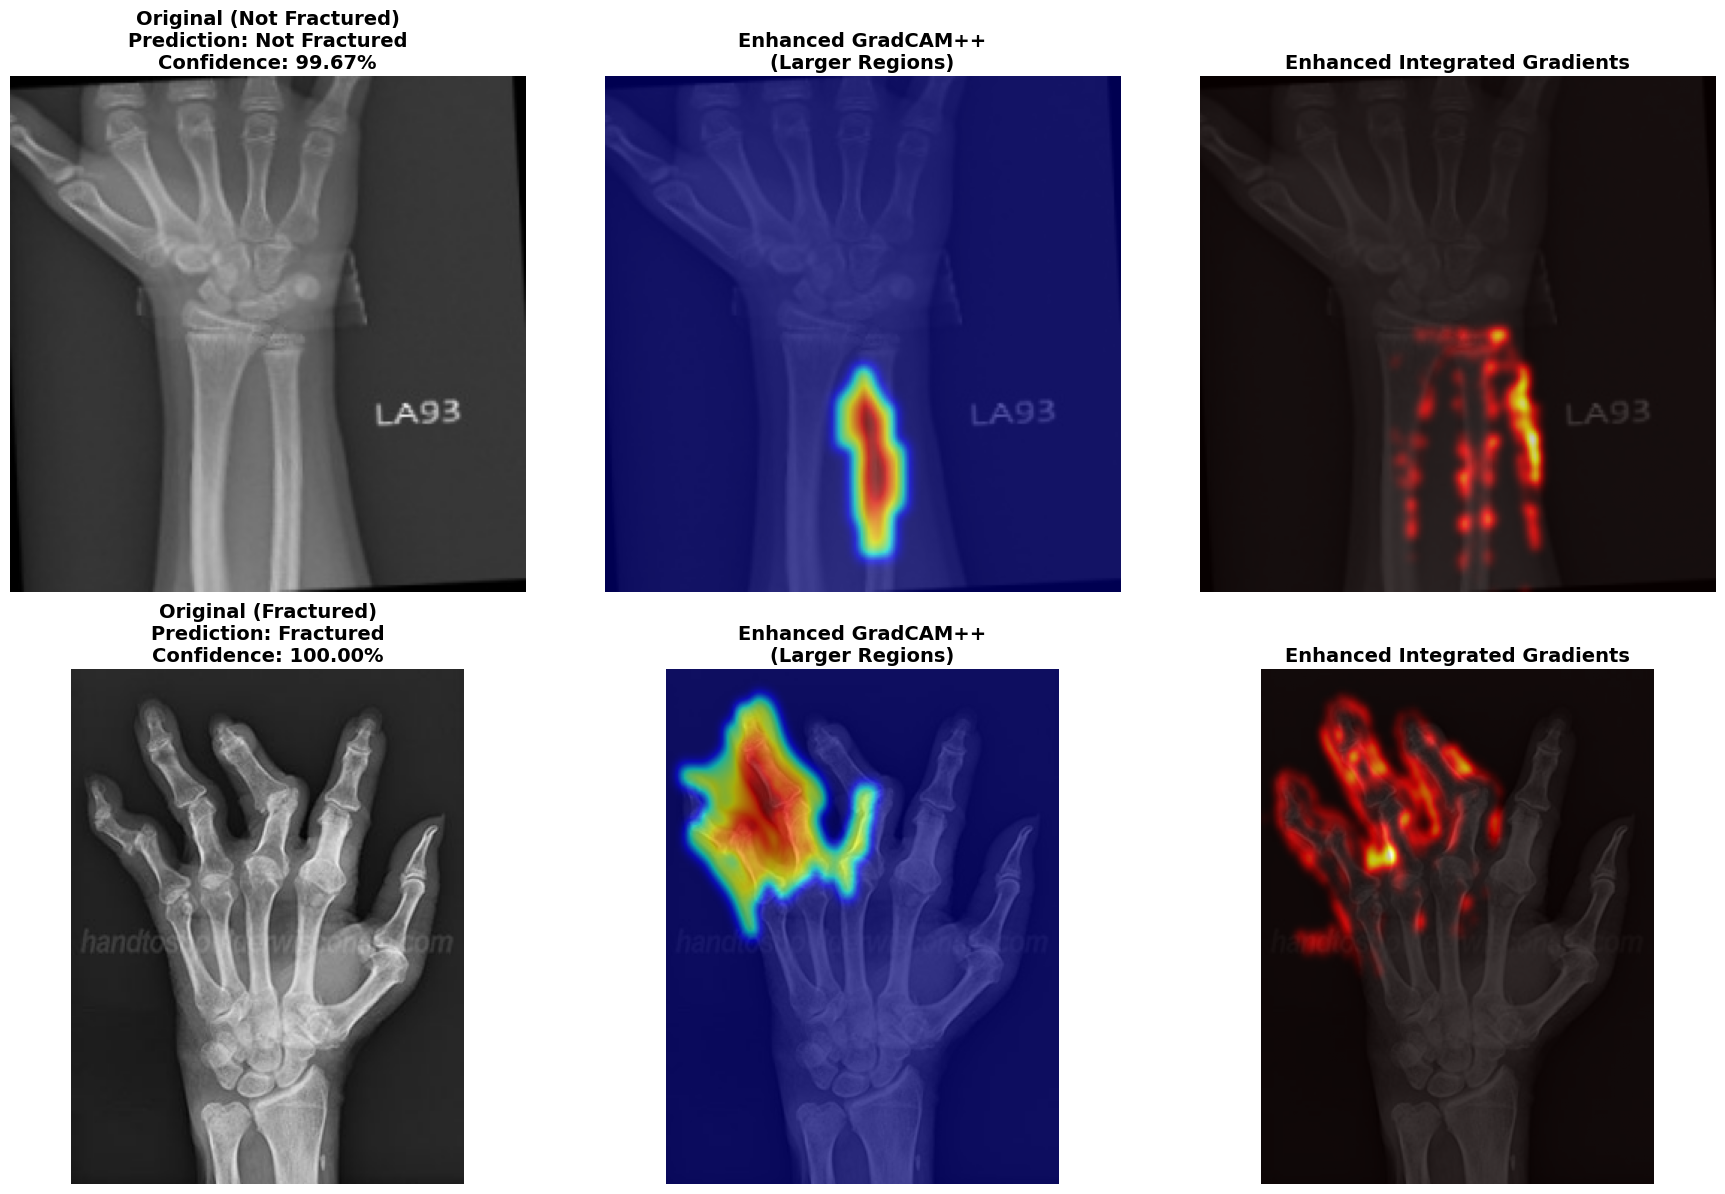

In [ ]:
# ================================
# INSTALL
# ================================


# ================================
# IMPORTS
# ================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from captum.attr import IntegratedGradients
from skimage.filters import sobel
from scipy import ndimage
import cv2

# ================================
# DEVICE & MODEL
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet18
model = torchvision.models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("cuckoo_pruned_final_model.pth", map_location=device))
model.to(device)
model.eval()

# ================================
# IMPROVED GRADCAM++ WITH LARGER REGIONS
# ================================
class EnhancedFractureGradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_tensor, img_gray, target_class=None):
        self.model.zero_grad()
        output = self.model(input_tensor)

        if target_class is None:
            target_class = output.argmax(dim=1).item()

        # Backprop
        class_loss = output[0, target_class]
        class_loss.backward()

        gradients = self.gradients[0]
        activations = self.activations[0]

        # GradCAM++ weights
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + (activations * gradients.pow(3)).sum(dim=(1, 2), keepdim=True)
        alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / (alpha_denom + 1e-8)

        weights = (alpha * F.relu(gradients)).sum(dim=(1, 2))
        cam = (weights[:, None, None] * activations).sum(dim=0)
        cam = F.relu(cam)

        # Normalize CAM
        cam -= cam.min()
        if cam.max() > 0:
            cam /= cam.max()

        # Resize to 224x224
        cam_np = cv2.resize(cam.cpu().numpy(), (224, 224))

        # Apply enhanced focusing with larger regions
        cam_enhanced = self.enhanced_fracture_focus(cam_np, img_gray)

        return cam_enhanced

    def enhanced_fracture_focus(self, cam, img_gray, focus_strength=1.8, threshold_percentile=55):
        """
        Enhanced version that creates larger, more visible highlighting regions
        """
        # 1. Multi-scale edge detection
        edges_sobel = sobel(img_gray)

        img_uint8 = (img_gray * 255).astype(np.uint8)
        edges_canny = cv2.Canny(img_uint8, 20, 80) / 255.0

        # Combine edges with more weight on Canny
        edges = np.maximum(edges_sobel, edges_canny * 1.8)
        edges = edges / (edges.max() + 1e-8)

        # 2. Less aggressive power transform for broader coverage
        cam_focused = np.power(cam, focus_strength)

        # 3. Lower threshold to include more region
        if cam_focused.max() > 0:
            threshold = np.percentile(cam_focused[cam_focused > 0], threshold_percentile)
            cam_focused[cam_focused < threshold] = 0

        # 4. Edge guidance with broader boost
        cam_edge_guided = cam_focused * (1 + edges * 3.0)

        # 5. More aggressive dilation to create larger regions
        if cam_edge_guided.max() > 0:
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()

            # Create larger structuring elements
            binary = cam_edge_guided > 0.3

            # First, dilate significantly to expand regions
            binary = ndimage.binary_dilation(binary, structure=np.ones((9, 9)))

            # Then closing to connect nearby components
            binary = ndimage.binary_closing(binary, structure=np.ones((11, 11)))

            # Light opening to smooth edges
            binary = ndimage.binary_opening(binary, structure=np.ones((3, 3)))

            # Dilate once more for visibility
            binary = ndimage.binary_dilation(binary, structure=np.ones((5, 5)))

            cam_edge_guided = cam_edge_guided * binary

        # 6. Component selection - keep strong components
        if cam_edge_guided.max() > 0:
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()

            labeled, num_features = ndimage.label(cam_edge_guided > 0.2)

            if num_features > 0:
                component_scores = []
                for i in range(1, num_features + 1):
                    mask = labeled == i
                    size = mask.sum()
                    avg_intensity = cam_edge_guided[mask].mean()
                    edge_alignment = edges[mask].mean()
                    # Score considers size, intensity, and edge alignment
                    score = avg_intensity * (1 + edge_alignment * 2) * np.sqrt(size)
                    component_scores.append((i, score, size))

                # Keep top 2-3 components, but require minimum size
                component_scores.sort(key=lambda x: x[1], reverse=True)
                keep_components = [c[0] for c in component_scores[:3] if c[2] > 20]

                if keep_components:
                    final_mask = np.zeros_like(cam_edge_guided)
                    for comp_id in keep_components:
                        comp_mask = (labeled == comp_id).astype(float)
                        # Dilate each component separately for better visibility
                        comp_mask = ndimage.binary_dilation(comp_mask, structure=np.ones((7, 7)))
                        final_mask += comp_mask

                    final_mask = np.clip(final_mask, 0, 1)
                    cam_edge_guided = cam_edge_guided * (final_mask > 0)

        # 7. Distance transform for smoother gradients
        if cam_edge_guided.max() > 0:
            binary_mask = cam_edge_guided > 0
            # Create distance from edge for gradient effect
            distance = ndimage.distance_transform_edt(binary_mask)
            if distance.max() > 0:
                distance = distance / distance.max()
                # Blend original with distance for smoother appearance
                cam_edge_guided = cam_edge_guided * 0.7 + distance * 0.3

        # 8. Gaussian smoothing for better visualization
        if cam_edge_guided.max() > 0:
            cam_edge_guided = ndimage.gaussian_filter(cam_edge_guided, sigma=2.5)
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()
            # Lighter gamma for broader visibility
            cam_edge_guided = np.power(cam_edge_guided, 0.7)

        return cam_edge_guided

# ================================
# PREPROCESSING
# ================================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert("RGB")
    img_original = np.array(img)
    img_resized = img.resize((224, 224))
    img_gray = np.array(img_resized.convert("L")) / 255.0
    x = transform(img).unsqueeze(0).to(device)
    return img_original, img_resized, img_gray, x

# ================================
# ENHANCED INTEGRATED GRADIENTS
# ================================
def enhanced_fracture_ig(x, img_gray, cam, target):
    ig = IntegratedGradients(model)
    attr = ig.attribute(x, target=target, n_steps=50)
    attr = attr.abs().sum(1).squeeze().cpu().numpy()

    # Normalize
    attr -= attr.min()
    if attr.max() > 0:
        attr /= attr.max()

    # Edge detection
    edges = sobel(img_gray)
    edges /= edges.max() + 1e-8

    # Broader CAM mask (top 40% instead of 30%)
    cam_mask = cam > np.percentile(cam, 60)

    # Dilate the mask for larger region
    cam_mask = ndimage.binary_dilation(cam_mask, structure=np.ones((15, 15)))

    # Combine
    fracture_map = attr * edges * cam_mask
    fracture_map -= fracture_map.min()
    if fracture_map.max() > 0:
        fracture_map /= fracture_map.max()

    # Less aggressive threshold (keep top 20% instead of 15%)
    threshold = np.percentile(fracture_map[fracture_map > 0], 80) if fracture_map.max() > 0 else 0
    fracture_map[fracture_map < threshold] = 0

    # Dilate the result for visibility
    if fracture_map.max() > 0:
        binary = fracture_map > 0
        binary = ndimage.binary_dilation(binary, structure=np.ones((11, 11)))
        fracture_map = fracture_map * binary

        fracture_map = np.sqrt(fracture_map)
        fracture_map = ndimage.gaussian_filter(fracture_map, sigma=2.0)
        fracture_map /= fracture_map.max()

    return fracture_map

# ================================
# EXTRACT GROUND TRUTH FROM PATH
# ================================
def get_ground_truth(path):
    """Extract ground truth label from file path"""
    path_lower = path.lower()
    if '/fractured/' in path_lower or '/fracture/' in path_lower:
        return 'Fractured'
    elif '/not fractured/' in path_lower or '/not_fractured/' in path_lower or '/notfractured/' in path_lower or '/normal/' in path_lower:
        return 'Not Fractured'
    else:
        # Try to extract from the path components
        import os
        path_parts = path.split('/')
        for part in path_parts:
            part_lower = part.lower()
            if 'fracture' in part_lower and 'not' not in part_lower:
                return 'Fractured'
            elif 'not' in part_lower and 'fracture' in part_lower:
                return 'Not Fractured'
            elif part_lower == 'normal':
                return 'Not Fractured'
        return 'Unknown'

# ================================
# PROCESS SINGLE IMAGE
# ================================
def process_image(path):
    img_original, img_resized, gray, x = load_image(path)

    # Prediction
    with torch.no_grad():
        output = model(x)
        probs = F.softmax(output, dim=1)
        pred = output.argmax(1).item()
        confidence = probs[0, pred].item()
    prediction_text = 'Fractured' if pred == 1 else 'Not Fractured'

    # Get ground truth
    ground_truth = get_ground_truth(path)

    # Enhanced GradCAM++
    cam_enhanced = EnhancedFractureGradCAM(model, model.layer4[-1].conv2)
    cam = cam_enhanced.generate(x, gray, pred)
    cam_original_size = cv2.resize(cam, (img_original.shape[1], img_original.shape[0]))

    # Enhanced Integrated Gradients
    ig_map = enhanced_fracture_ig(x, gray, cam, pred)
    ig_original_size = cv2.resize(ig_map, (img_original.shape[1], img_original.shape[0]))

    return img_original, cam_original_size, ig_original_size, prediction_text, confidence, ground_truth

# ================================
# INPUT IMAGE PATHS
# ================================
image_path_1 = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/4-rotated2-rotated1.jpg"
image_path_2 = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured/56.jpg"

# Process images
img1, cam1, ig1, pred1, conf1, gt1 = process_image(image_path_1)
img2, cam2, ig2, pred2, conf2, gt2 = process_image(image_path_2)

print(f"Image 1 - Ground Truth: {gt1}, Prediction: {pred1} (Confidence: {conf1:.2%})")
print(f"Image 2 - Ground Truth: {gt2}, Prediction: {pred2} (Confidence: {conf2:.2%})")

# ================================
# ENHANCED VISUALIZATION
# ================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (img, cam, ig, pred, conf, gt) in enumerate([
    (img1, cam1, ig1, pred1, conf1, gt1),
    (img2, cam2, ig2, pred2, conf2, gt2)
]):
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Original ({gt})\nPrediction: {pred}\nConfidence: {conf:.2%}", fontsize=14, fontweight='bold')
    axes[i, 0].axis("off")

    axes[i, 1].imshow(img)
    axes[i, 1].imshow(cam, cmap="jet", alpha=0.65, vmin=0, vmax=1)
    axes[i, 1].set_title("Enhanced GradCAM++\n(Larger Regions)", fontsize=14, fontweight='bold')
    axes[i, 1].axis("off")

    axes[i, 2].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")
    axes[i, 2].imshow(ig, cmap="hot", alpha=0.75, vmin=0, vmax=1)
    axes[i, 2].set_title("Enhanced Integrated Gradients", fontsize=14, fontweight='bold')
    axes[i, 2].axis("off")

plt.tight_layout()
plt.savefig("fracture_analysis_enhanced_larger.png", dpi=300, bbox_inches='tight')
plt.show()

Image 1 - Ground Truth: Not Fractured, Prediction: Not Fractured (Confidence: 98.01%)
Image 2 - Ground Truth: Fractured, Prediction: Fractured (Confidence: 100.00%)


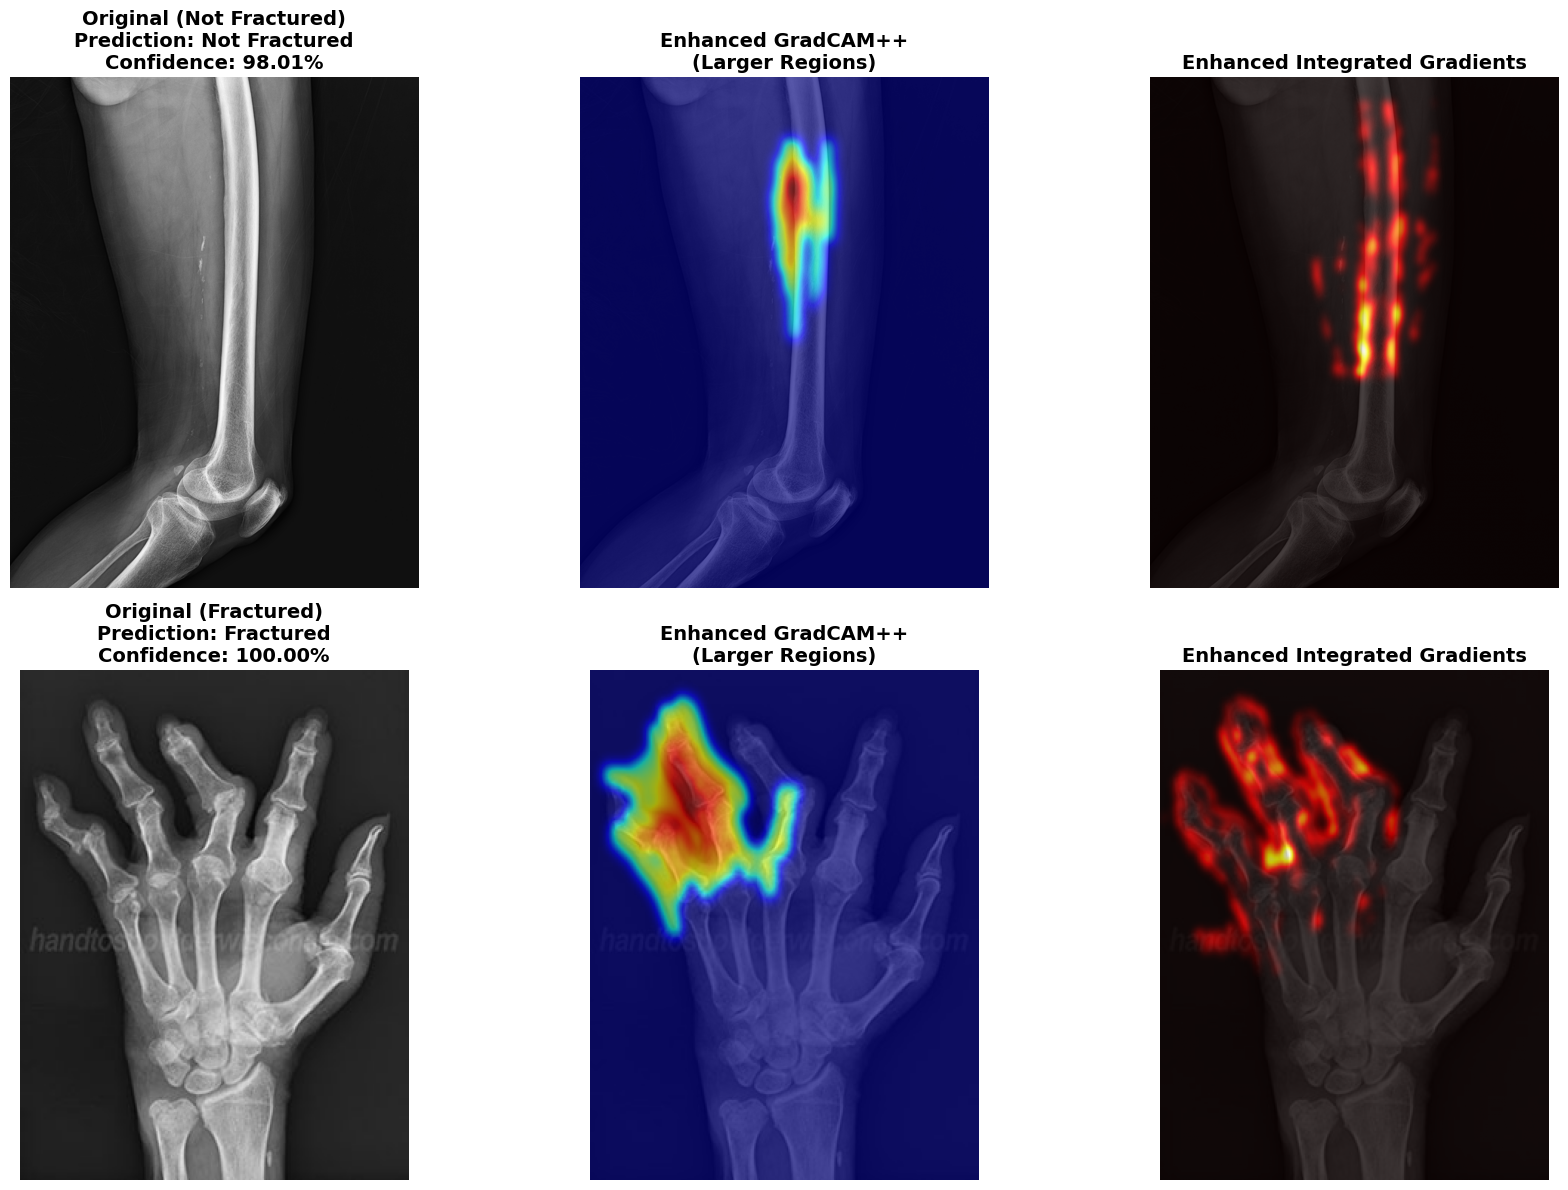

In [ ]:
# ================================
# INSTALL
# ================================


# ================================
# IMPORTS
# ================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from captum.attr import IntegratedGradients
from skimage.filters import sobel
from scipy import ndimage
import cv2

# ================================
# DEVICE & MODEL
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet18
model = torchvision.models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("cuckoo_pruned_final_model.pth", map_location=device))
model.to(device)
model.eval()

# ================================
# IMPROVED GRADCAM++ WITH LARGER REGIONS
# ================================
class EnhancedFractureGradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_tensor, img_gray, target_class=None):
        self.model.zero_grad()
        output = self.model(input_tensor)

        if target_class is None:
            target_class = output.argmax(dim=1).item()

        # Backprop
        class_loss = output[0, target_class]
        class_loss.backward()

        gradients = self.gradients[0]
        activations = self.activations[0]

        # GradCAM++ weights
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + (activations * gradients.pow(3)).sum(dim=(1, 2), keepdim=True)
        alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / (alpha_denom + 1e-8)

        weights = (alpha * F.relu(gradients)).sum(dim=(1, 2))
        cam = (weights[:, None, None] * activations).sum(dim=0)
        cam = F.relu(cam)

        # Normalize CAM
        cam -= cam.min()
        if cam.max() > 0:
            cam /= cam.max()

        # Resize to 224x224
        cam_np = cv2.resize(cam.cpu().numpy(), (224, 224))

        # Apply enhanced focusing with larger regions
        cam_enhanced = self.enhanced_fracture_focus(cam_np, img_gray)

        return cam_enhanced

    def enhanced_fracture_focus(self, cam, img_gray, focus_strength=1.8, threshold_percentile=55):
        """
        Enhanced version that creates larger, more visible highlighting regions
        """
        # 1. Multi-scale edge detection
        edges_sobel = sobel(img_gray)

        img_uint8 = (img_gray * 255).astype(np.uint8)
        edges_canny = cv2.Canny(img_uint8, 20, 80) / 255.0

        # Combine edges with more weight on Canny
        edges = np.maximum(edges_sobel, edges_canny * 1.8)
        edges = edges / (edges.max() + 1e-8)

        # 2. Less aggressive power transform for broader coverage
        cam_focused = np.power(cam, focus_strength)

        # 3. Lower threshold to include more region
        if cam_focused.max() > 0:
            threshold = np.percentile(cam_focused[cam_focused > 0], threshold_percentile)
            cam_focused[cam_focused < threshold] = 0

        # 4. Edge guidance with broader boost
        cam_edge_guided = cam_focused * (1 + edges * 3.0)

        # 5. More aggressive dilation to create larger regions
        if cam_edge_guided.max() > 0:
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()

            # Create larger structuring elements
            binary = cam_edge_guided > 0.3

            # First, dilate significantly to expand regions
            binary = ndimage.binary_dilation(binary, structure=np.ones((9, 9)))

            # Then closing to connect nearby components
            binary = ndimage.binary_closing(binary, structure=np.ones((11, 11)))

            # Light opening to smooth edges
            binary = ndimage.binary_opening(binary, structure=np.ones((3, 3)))

            # Dilate once more for visibility
            binary = ndimage.binary_dilation(binary, structure=np.ones((5, 5)))

            cam_edge_guided = cam_edge_guided * binary

        # 6. Component selection - keep strong components
        if cam_edge_guided.max() > 0:
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()

            labeled, num_features = ndimage.label(cam_edge_guided > 0.2)

            if num_features > 0:
                component_scores = []
                for i in range(1, num_features + 1):
                    mask = labeled == i
                    size = mask.sum()
                    avg_intensity = cam_edge_guided[mask].mean()
                    edge_alignment = edges[mask].mean()
                    # Score considers size, intensity, and edge alignment
                    score = avg_intensity * (1 + edge_alignment * 2) * np.sqrt(size)
                    component_scores.append((i, score, size))

                # Keep top 2-3 components, but require minimum size
                component_scores.sort(key=lambda x: x[1], reverse=True)
                keep_components = [c[0] for c in component_scores[:3] if c[2] > 20]

                if keep_components:
                    final_mask = np.zeros_like(cam_edge_guided)
                    for comp_id in keep_components:
                        comp_mask = (labeled == comp_id).astype(float)
                        # Dilate each component separately for better visibility
                        comp_mask = ndimage.binary_dilation(comp_mask, structure=np.ones((7, 7)))
                        final_mask += comp_mask

                    final_mask = np.clip(final_mask, 0, 1)
                    cam_edge_guided = cam_edge_guided * (final_mask > 0)

        # 7. Distance transform for smoother gradients
        if cam_edge_guided.max() > 0:
            binary_mask = cam_edge_guided > 0
            # Create distance from edge for gradient effect
            distance = ndimage.distance_transform_edt(binary_mask)
            if distance.max() > 0:
                distance = distance / distance.max()
                # Blend original with distance for smoother appearance
                cam_edge_guided = cam_edge_guided * 0.7 + distance * 0.3

        # 8. Gaussian smoothing for better visualization
        if cam_edge_guided.max() > 0:
            cam_edge_guided = ndimage.gaussian_filter(cam_edge_guided, sigma=2.5)
            cam_edge_guided = cam_edge_guided / cam_edge_guided.max()
            # Lighter gamma for broader visibility
            cam_edge_guided = np.power(cam_edge_guided, 0.7)

        return cam_edge_guided

# ================================
# PREPROCESSING
# ================================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

def load_image(path):
    img = Image.open(path).convert("RGB")
    img_original = np.array(img)
    img_resized = img.resize((224, 224))
    img_gray = np.array(img_resized.convert("L")) / 255.0
    x = transform(img).unsqueeze(0).to(device)
    return img_original, img_resized, img_gray, x

# ================================
# ENHANCED INTEGRATED GRADIENTS
# ================================
def enhanced_fracture_ig(x, img_gray, cam, target):
    ig = IntegratedGradients(model)
    attr = ig.attribute(x, target=target, n_steps=50)
    attr = attr.abs().sum(1).squeeze().cpu().numpy()

    # Normalize
    attr -= attr.min()
    if attr.max() > 0:
        attr /= attr.max()

    # Edge detection
    edges = sobel(img_gray)
    edges /= edges.max() + 1e-8

    # Broader CAM mask (top 40% instead of 30%)
    cam_mask = cam > np.percentile(cam, 60)

    # Dilate the mask for larger region
    cam_mask = ndimage.binary_dilation(cam_mask, structure=np.ones((15, 15)))

    # Combine
    fracture_map = attr * edges * cam_mask
    fracture_map -= fracture_map.min()
    if fracture_map.max() > 0:
        fracture_map /= fracture_map.max()

    # Less aggressive threshold (keep top 20% instead of 15%)
    threshold = np.percentile(fracture_map[fracture_map > 0], 80) if fracture_map.max() > 0 else 0
    fracture_map[fracture_map < threshold] = 0

    # Dilate the result for visibility
    if fracture_map.max() > 0:
        binary = fracture_map > 0
        binary = ndimage.binary_dilation(binary, structure=np.ones((11, 11)))
        fracture_map = fracture_map * binary

        fracture_map = np.sqrt(fracture_map)
        fracture_map = ndimage.gaussian_filter(fracture_map, sigma=2.0)
        fracture_map /= fracture_map.max()

    return fracture_map

# ================================
# EXTRACT GROUND TRUTH FROM PATH
# ================================
def get_ground_truth(path):
    """Extract ground truth label from file path"""
    path_lower = path.lower()
    if '/fractured/' in path_lower or '/fracture/' in path_lower:
        return 'Fractured'
    elif '/not fractured/' in path_lower or '/not_fractured/' in path_lower or '/notfractured/' in path_lower or '/normal/' in path_lower:
        return 'Not Fractured'
    else:
        # Try to extract from the path components
        import os
        path_parts = path.split('/')
        for part in path_parts:
            part_lower = part.lower()
            if 'fracture' in part_lower and 'not' not in part_lower:
                return 'Fractured'
            elif 'not' in part_lower and 'fracture' in part_lower:
                return 'Not Fractured'
            elif part_lower == 'normal':
                return 'Not Fractured'
        return 'Unknown'

# ================================
# PROCESS SINGLE IMAGE
# ================================
def process_image(path):
    img_original, img_resized, gray, x = load_image(path)

    # Prediction
    with torch.no_grad():
        output = model(x)
        probs = F.softmax(output, dim=1)
        pred = output.argmax(1).item()
        confidence = probs[0, pred].item()
    prediction_text = 'Fractured' if pred == 1 else 'Not Fractured'

    # Get ground truth
    ground_truth = get_ground_truth(path)

    # Enhanced GradCAM++
    cam_enhanced = EnhancedFractureGradCAM(model, model.layer4[-1].conv2)
    cam = cam_enhanced.generate(x, gray, pred)
    cam_original_size = cv2.resize(cam, (img_original.shape[1], img_original.shape[0]))

    # Enhanced Integrated Gradients
    ig_map = enhanced_fracture_ig(x, gray, cam, pred)
    ig_original_size = cv2.resize(ig_map, (img_original.shape[1], img_original.shape[0]))

    return img_original, cam_original_size, ig_original_size, prediction_text, confidence, ground_truth

# ================================
# INPUT IMAGE PATHS
# ================================
image_path_1 = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0000249.jpg"
image_path_2 = "/content/xray_dataset/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured/56.jpg"

# Process images
img1, cam1, ig1, pred1, conf1, gt1 = process_image(image_path_1)
img2, cam2, ig2, pred2, conf2, gt2 = process_image(image_path_2)

print(f"Image 1 - Ground Truth: {gt1}, Prediction: {pred1} (Confidence: {conf1:.2%})")
print(f"Image 2 - Ground Truth: {gt2}, Prediction: {pred2} (Confidence: {conf2:.2%})")

# ================================
# ENHANCED VISUALIZATION
# ================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (img, cam, ig, pred, conf, gt) in enumerate([
    (img1, cam1, ig1, pred1, conf1, gt1),
    (img2, cam2, ig2, pred2, conf2, gt2)
]):
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Original ({gt})\nPrediction: {pred}\nConfidence: {conf:.2%}", fontsize=14, fontweight='bold')
    axes[i, 0].axis("off")

    axes[i, 1].imshow(img)
    axes[i, 1].imshow(cam, cmap="jet", alpha=0.65, vmin=0, vmax=1)
    axes[i, 1].set_title("Enhanced GradCAM++\n(Larger Regions)", fontsize=14, fontweight='bold')
    axes[i, 1].axis("off")

    axes[i, 2].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")
    axes[i, 2].imshow(ig, cmap="hot", alpha=0.75, vmin=0, vmax=1)
    axes[i, 2].set_title("Enhanced Integrated Gradients", fontsize=14, fontweight='bold')
    axes[i, 2].axis("off")

plt.tight_layout()
plt.savefig("fracture_analysis_enhanced_larger.png", dpi=300, bbox_inches='tight')
plt.show()